In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#load the dataset
data = pd.read_csv("./DataSets/covid.csv")
data.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2


In [3]:
#make a copy of dataset
df = data.copy()
display(df.head())

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2


In [4]:
#Notes on the dataset:

#We have categorical variables already encoded.
#Serie 'sex': 1 for female and 2 for male.
#Serie 'patient_type': 1 for Outpatient and 2 for Inpatient
#Serie 'date_died': No precise indication for the value '9999-99-99'. Perhaps we can consider that the patient is still alive for this value.
#Rest of series: 1 for yes, 2 for No and 97, 98, 99 for not applicable or missing data.#


# data mining: to get information as much as possible

In [5]:
#Observation: 566602
#23 columns with:
#id column
#Features: 21
#Target: 'covid_res'
#Variable types: 19 of type: integer, 4 of type: object
#Type: Classification

shape of dataframe: (566602, 23)

Variable types:
 int64     19
object     4
dtype: int64 AxesSubplot(0.22375,0.11;0.5775x0.77)


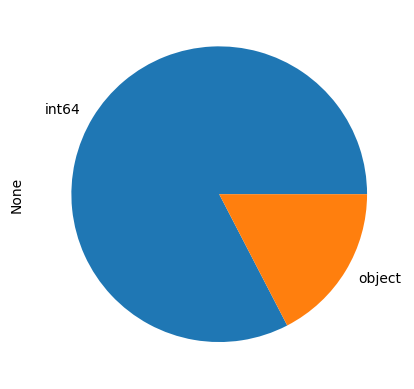

In [6]:
#shape of dataset 
print("shape of dataframe:", df.shape)
#data types 
print("\nVariable types:\n", df.dtypes.value_counts(),df.dtypes.value_counts().plot.pie())
plt.draw()

In [7]:
#lets get some info
print("\nData info")
print(df.info())


Data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   566602 non-null  object
 1   sex                  566602 non-null  int64 
 2   patient_type         566602 non-null  int64 
 3   entry_date           566602 non-null  object
 4   date_symptoms        566602 non-null  object
 5   date_died            566602 non-null  object
 6   intubed              566602 non-null  int64 
 7   pneumonia            566602 non-null  int64 
 8   age                  566602 non-null  int64 
 9   pregnancy            566602 non-null  int64 
 10  diabetes             566602 non-null  int64 
 11  copd                 566602 non-null  int64 
 12  asthma               566602 non-null  int64 
 13  inmsupr              566602 non-null  int64 
 14  hypertension         566602 non-null  int64 
 15  other_disease        56

In [8]:
#check the presence of NaN
df.isna().sum()

id                     0
sex                    0
patient_type           0
entry_date             0
date_symptoms          0
date_died              0
intubed                0
pneumonia              0
age                    0
pregnancy              0
diabetes               0
copd                   0
asthma                 0
inmsupr                0
hypertension           0
other_disease          0
cardiovascular         0
obesity                0
renal_chronic          0
tobacco                0
contact_other_covid    0
covid_res              0
icu                    0
dtype: int64

# Visualization of data

In [9]:
#Here we will consider that 97, 98, 99 and '9999-99-99' as not applicable or missing values to get a better idea.
#Note that for 'age' serie, the 97, 98, 99 are simply the age of patient.

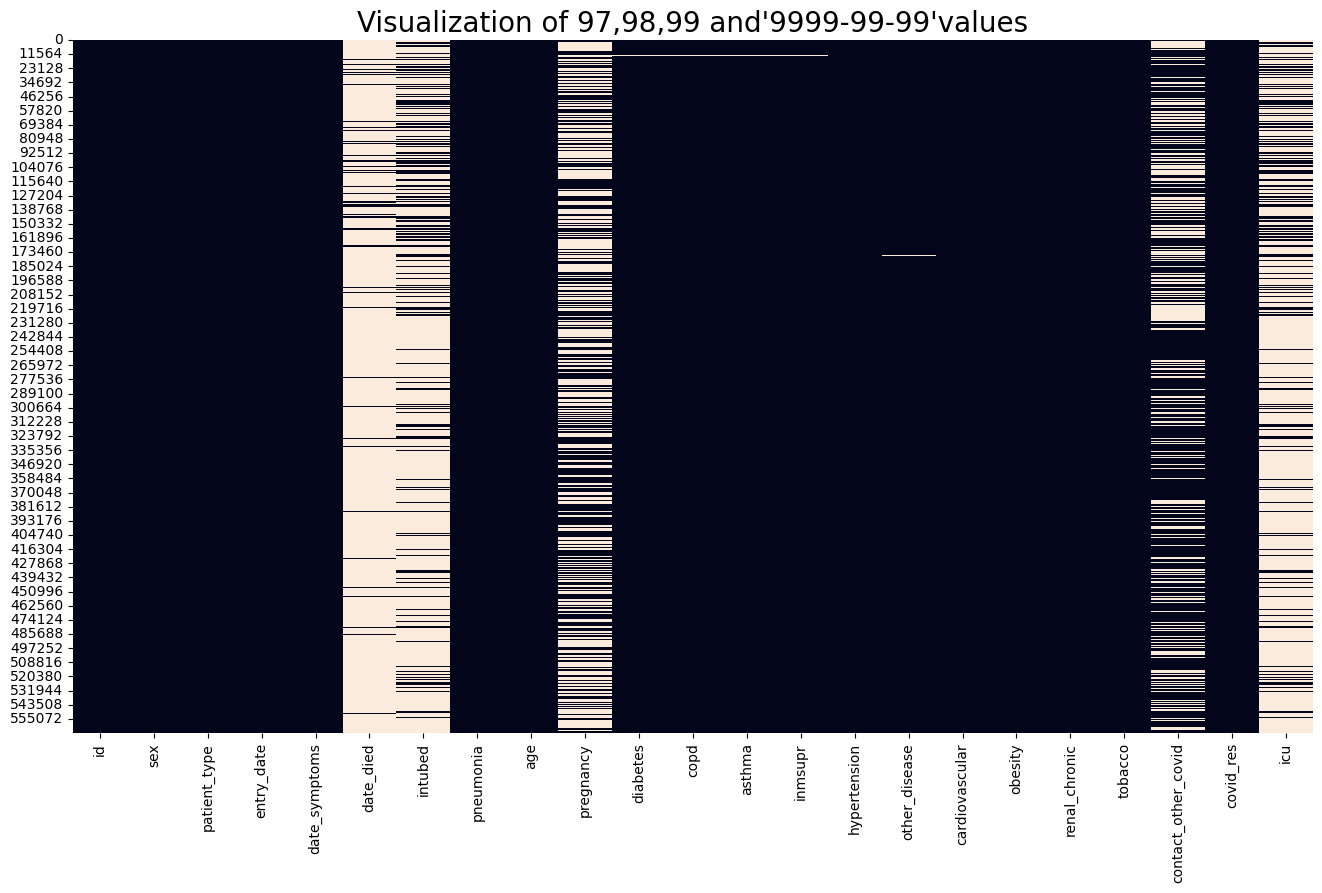

In [10]:
plt.figure(figsize=(16,9))
sb.heatmap(df.isin([97,98,99,'9999-99-99']),cbar = False)
plt.title('Visualization of 97,98,99 and\'9999-99-99\'values',size=20)
plt.draw()


In [11]:
#lets calculate the different percentage
print("percentage:\n")
print(((df.isin([97,98,99,'9999-99-99']).sum()/df.shape[0]*100).round(3)).sort_values(ascending=False))

percentage:

date_died              93.615
icu                    78.506
intubed                78.505
pregnancy              50.953
contact_other_covid    30.891
other_disease           0.459
diabetes                0.350
inmsupr                 0.349
tobacco                 0.337
cardiovascular          0.322
hypertension            0.322
renal_chronic           0.316
obesity                 0.314
copd                    0.309
asthma                  0.309
age                     0.037
pneumonia               0.002
sex                     0.000
date_symptoms           0.000
entry_date              0.000
patient_type            0.000
covid_res               0.000
id                      0.000
dtype: float64


In [12]:
#In summary:

#Presence of NaN: False.
#Serie 'date_died': 93.6 % of values are '9999-99-99'. We should really thinking about transform this serie. For '9999-99-99' the patient is still alive for otherwise, unfortunately he is died.
#Series 'Intubed' and 'ICU'(Intensive Care Unit) gets 78.5%! And the missing values seems to be at the same places on the heatmap. So, is an intubated patient necessarily in intensive care? We should use a crosstab to verify.
#'pregnancy' a 51% ! Interesting. We should check by gender.
#'contact_other_covid' get 30% od missing or not applicable values. The rest seems to be good.

# lets start with categorical crosstab

In [13]:
pd.crosstab(df['intubed'],df['icu'])

icu,1,2,97,99
intubed,,,,
1,5010,4955,0,0
2,5102,106721,0,1
97,0,0,444689,0
99,0,0,0,124


In [14]:
pd.crosstab(df['patient_type'],[df['intubed'],df['icu']])

intubed         1           2                  97   99
icu             1     2     1       2  99      97   99
patient_type                                          
1                0     0     0       0  0  444689    0
2             5010  4955  5102  106721  1       0  124

In [15]:
#with percentage
round(pd.crosstab(df['patient_type'],[df['intubed'],df['icu']],normalize = True).apply(lambda x:x*100),3) 

intubed          1           2                    97     99
icu              1      2    1       2    99      97     99
patient_type                                               
1             0.000  0.000  0.0   0.000  0.0  78.483  0.000
2             0.884  0.875  0.9  18.835  0.0   0.000  0.022

In [16]:
#78.48% (the 444689) are not hospitalized.
#Also, 0.02% are actually hospitalized but with missing value for intubed and icu.
#21.52% of patients in the data are hospitalized and 87.54% of them are neither intubated nor in intensive care.

In [17]:
#contact other covid
round(pd.crosstab(df['covid_res'],df['contact_other_covid'],normalize = True).apply(lambda x:x*100),3)

contact_other_covid,1,2,99
covid_res,,,
1,13.110,11.534,14.300
2,21.653,14.772,12.822
3,4.395,3.645,3.769


In [18]:
#21.65% of people have been in contact with covid and are tested negative against 13% who are positive!

In [19]:
print('percentage of female:',round(df[df['sex']==1]['sex'].count()/df['sex'].count()*100,3),'%')
print('percentage of male:',round(df[df['sex']==2]['sex'].count()/df['sex'].count()*100,3),'%')

percentage of female: 49.327 %
percentage of male: 50.673 %


In [20]:
#Good for us, the data is well balanced regarding the gender.


In [21]:
pd.crosstab(df['sex'],df['pregnancy'])

pregnancy,1,2,97,98
sex,,,,
1,4063,273840,0,1587
2,0,0,287112,0


In [22]:
#For 'pregnancy' the value 97 is used for male. So, this is not a missing value but actually not applicable.
#Perhaps during preprocessing and model development, we can replace this value by no(2). However, this will bias the data to not being pregnant.

In [23]:
#real percentage of missing value in serie'pregnancy'
print(('percentage of missing value in pregnancy :'),round(len(df[(df.sex==1)&(df.pregnancy==98)])/len(df[df.sex==1])*100,3))

percentage of missing value in pregnancy : 0.568


In [24]:
print("target classes\n",df['covid_res'].unique())
print("-"*50)
display(df['covid_res'].value_counts(normalize=True).to_frame())

target classes
 [1 2 3]
--------------------------------------------------


,covid_res
2,0.492471
1,0.389439
3,0.118090


In [25]:
#covid_res: 3 classes: 1, 2, 3
#49% tested negative for covid19 against 39% positif. Classes are relatively well balanced.
#12 % are waiting for results.

In [26]:
df.drop(['covid_res'],axis = 1, inplace = False).describe()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,icu
count,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000
mean,1.506726,1.215165,76.562952,1.846262,42.622483,50.400692,2.210633,2.280221,2.265029,2.319628,2.145774,2.410030,2.286157,2.138905,2.283765,2.238360,31.573034,76.562864
std,0.499955,0.410937,39.058676,0.560939,16.659973,47.501579,5.683523,5.327832,5.334658,5.667381,5.459866,6.489959,5.438405,5.395578,5.393232,5.571901,45.082123,39.059060
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,97.000000,2.000000,31.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,97.000000
50%,2.000000,1.000000,97.000000,2.000000,41.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,97.000000
75%,2.000000,1.000000,97.000000,2.000000,53.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,97.000000
max,2.000000,2.000000,99.000000,99.000000,120.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,99.000000


In [27]:
#Note: Except age, these values have no particular meaning
#50% of patient are between 31 and 53 years old.
#Note max_age = 120 ans!


# Visualization of feature 

In [28]:
df_cleaned=df[df.isin([97,98,99])==False]

    

In [29]:
intd = []
objd = []
for i in df_cleaned.drop(['covid_res','age'],1).columns:
    if (df_cleaned[i].dtypes == "object"):
        objd.append(i)
    else:
        intd.append(i)


C:\Users\USER\AppData\Local\Temp\ipykernel_23656\1253825434.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  for i in df_cleaned.drop(['covid_res','age'],1).columns:


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


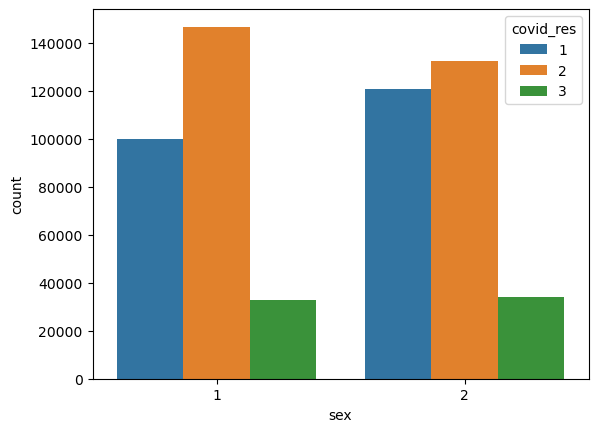

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


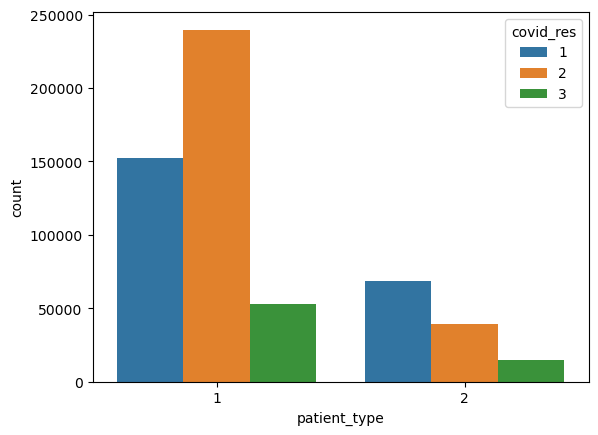

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


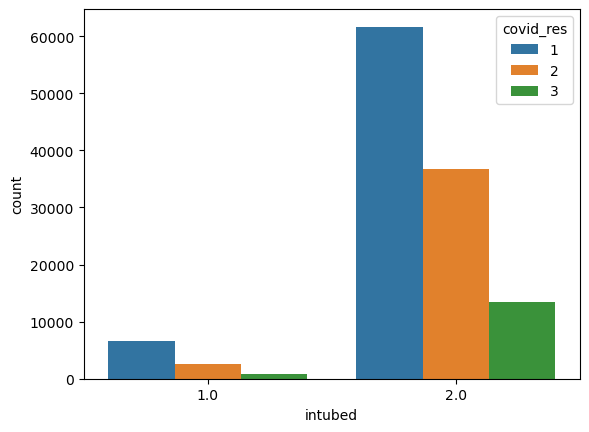

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


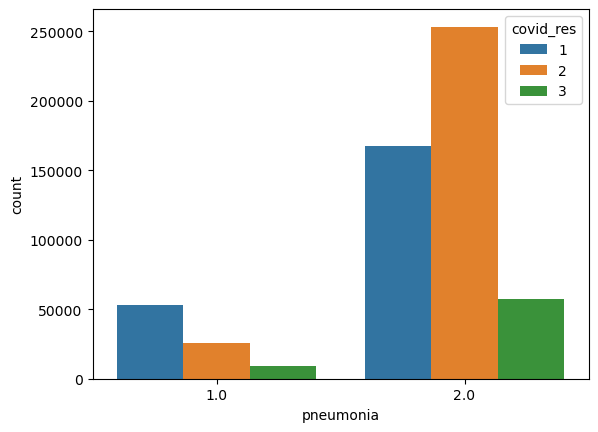

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


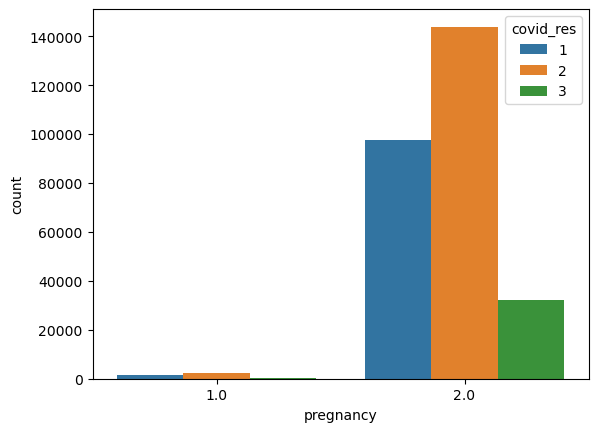

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


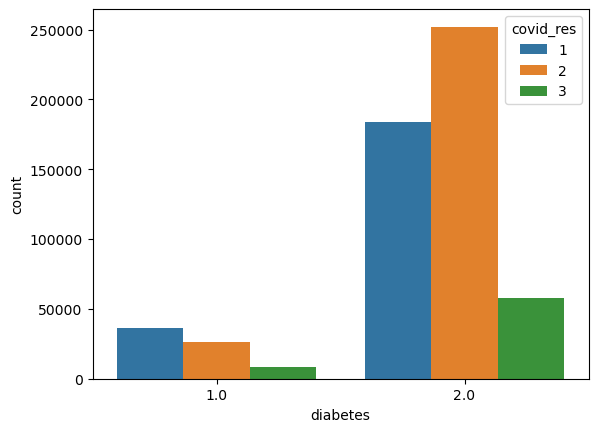

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


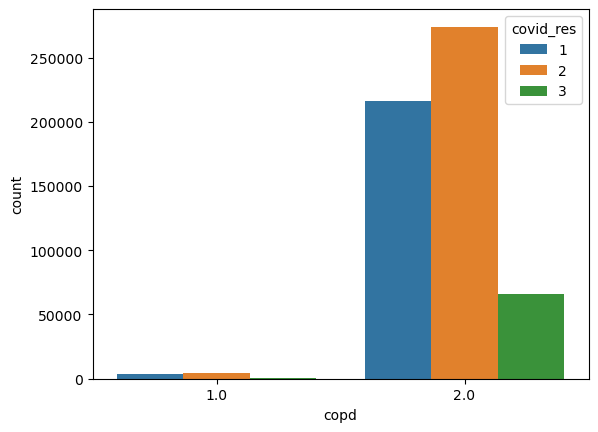

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


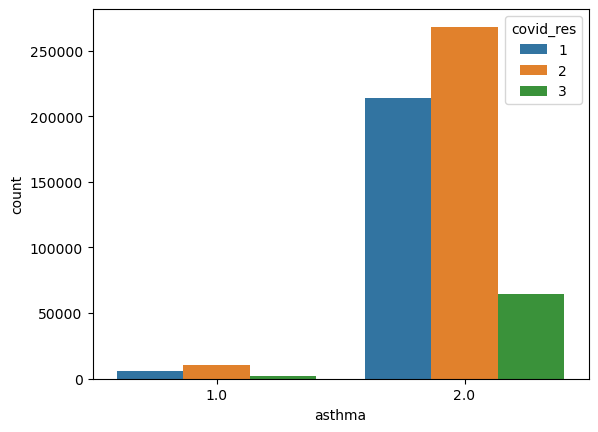

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


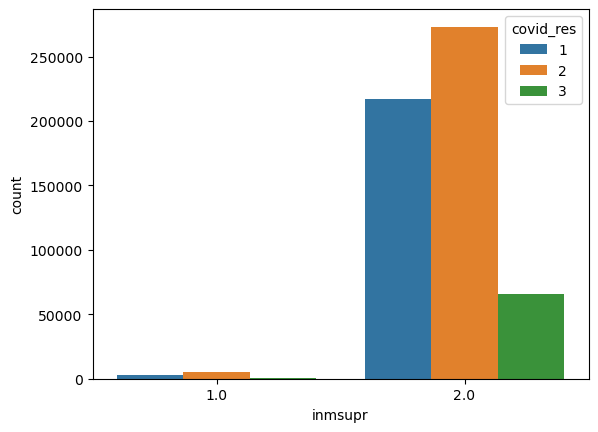

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


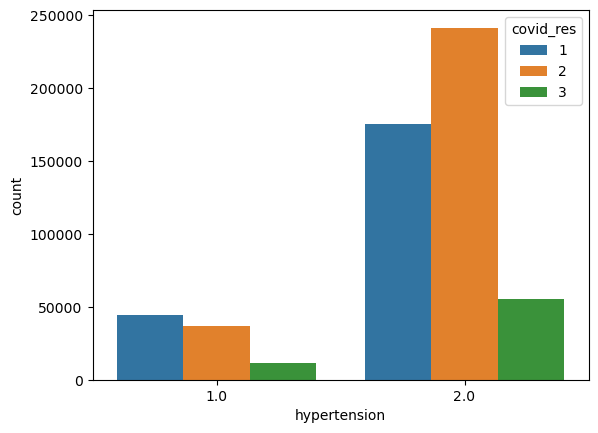

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


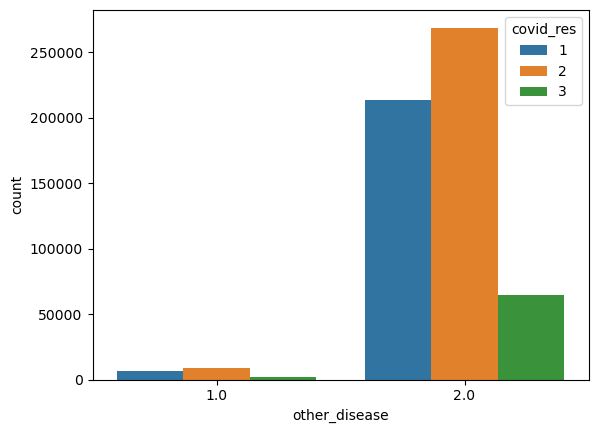

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


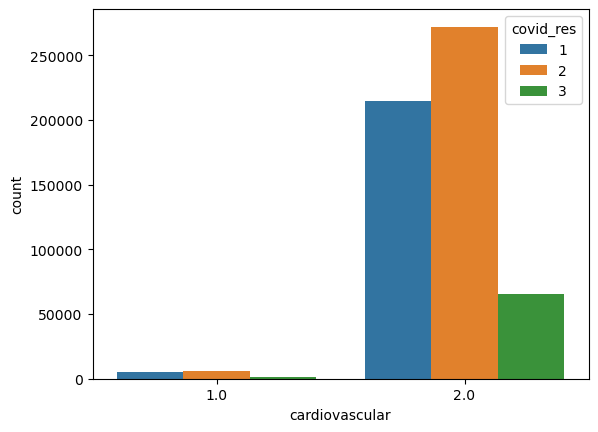

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


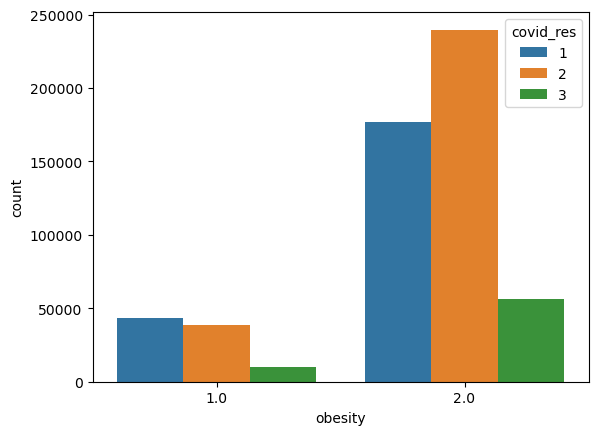

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


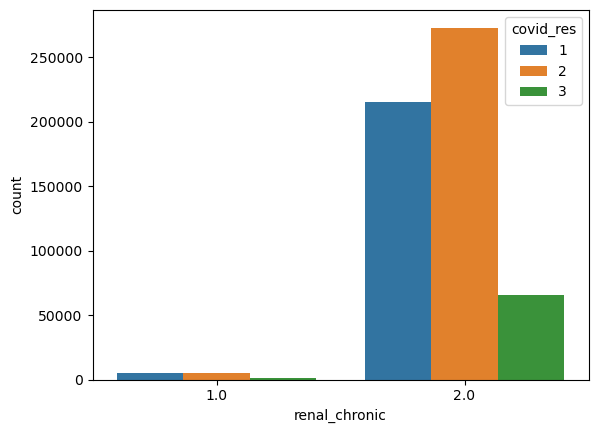

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


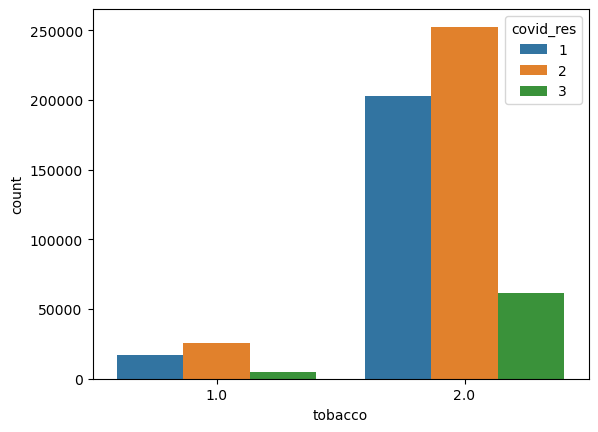

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


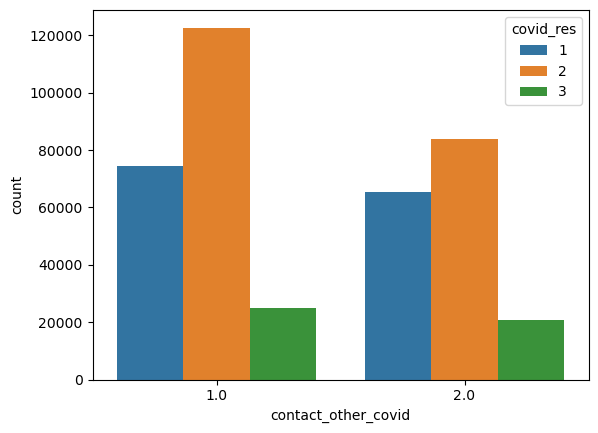

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


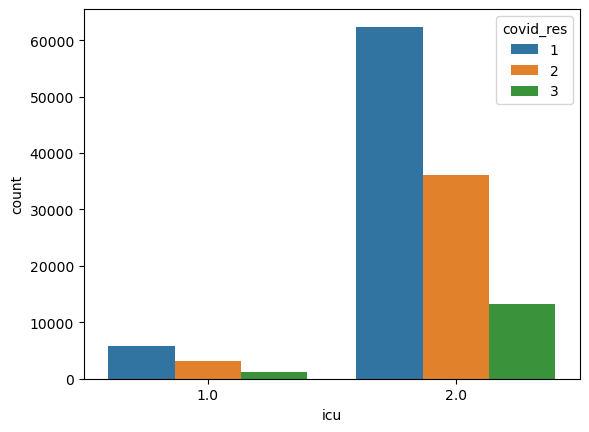

In [30]:
for i in intd:
    sb.countplot(df_cleaned[i],hue=df_cleaned.covid_res)
    plt.show()

In [31]:
#The majority of results are negative. Especially for 'pneumonia', 'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular', 'obesity', 'renal_chronic', 'tobacco'.
#We will make two subsets, healthy for patient who get negative results for all diseases except covid 19 and sick for patient who get at least one disease.

In [32]:
df['healthy']=((df['pneumonia']==2)&(df['diabetes']==2)&(df['copd']==2)&(df['asthma']==2)&(df['inmsupr']==2)&(df['hypertension']==2)&(df['cardiovascular']==2)&(df['obesity']==2)&(df['renal_chronic']==2))
display(df.head())
display(df['healthy'].value_counts())
print('percentage:\n',round(df['healthy'].value_counts()/df['healthy'].count(),3))

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,healthy
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,1,97,True
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,99,1,97,True
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,1,2,2,99,1,2,False
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,99,1,2,False
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,1,2,1,2,2,2,99,1,2,False


True     324223
False    242379
Name: healthy, dtype: int64

percentage:
 True     0.572
False    0.428
Name: healthy, dtype: float64


In [33]:
#57.2% of patients do not present with any diseases listed above.
#So this can be make some trouble for our model especially if we want it based on different clinical signs

subsets healthy et sicks

In [34]:
healthy = df[df["healthy"]]
sick=df[~df['healthy']]

In [35]:
print('shape of healthy:',healthy.shape)
healthy['covid_res'].value_counts(normalize=True)

shape of healthy: (324223, 24)


2    0.552469
1    0.327395
3    0.120136
Name: covid_res, dtype: float64

In [36]:
#55.2% of healthy data do not get covid and 12% are waiting for results.

In [37]:
sick['covid_res'].value_counts(normalize=True)

1    0.472434
2    0.412214
3    0.115352
Name: covid_res, dtype: float64

In [38]:
print('shape of sick:',sick.shape)
sick[sick['covid_res']!=3]['covid_res'].value_counts(normalize=True)

shape of sick: (242379, 24)


1    0.534036
2    0.465964
Name: covid_res, dtype: float64

In [39]:
#Note: here patients have at least one disease and we do not consider those who are waiting for the covid result.
#53.4% of patients are positive for covid against 46.6%. This subset is relatively well balanced.
#We should consider the sick data for our model.

serie age

In [40]:
#define some subsets 
female = df[df['sex']==1]
male = df[df['sex']==2]
female_positive=female[female['covid_res']==1]
female_negative=female[female['covid_res']==2]
male_positive=male[male['covid_res']==1]
male_negative=male[male['covid_res']==2]


C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

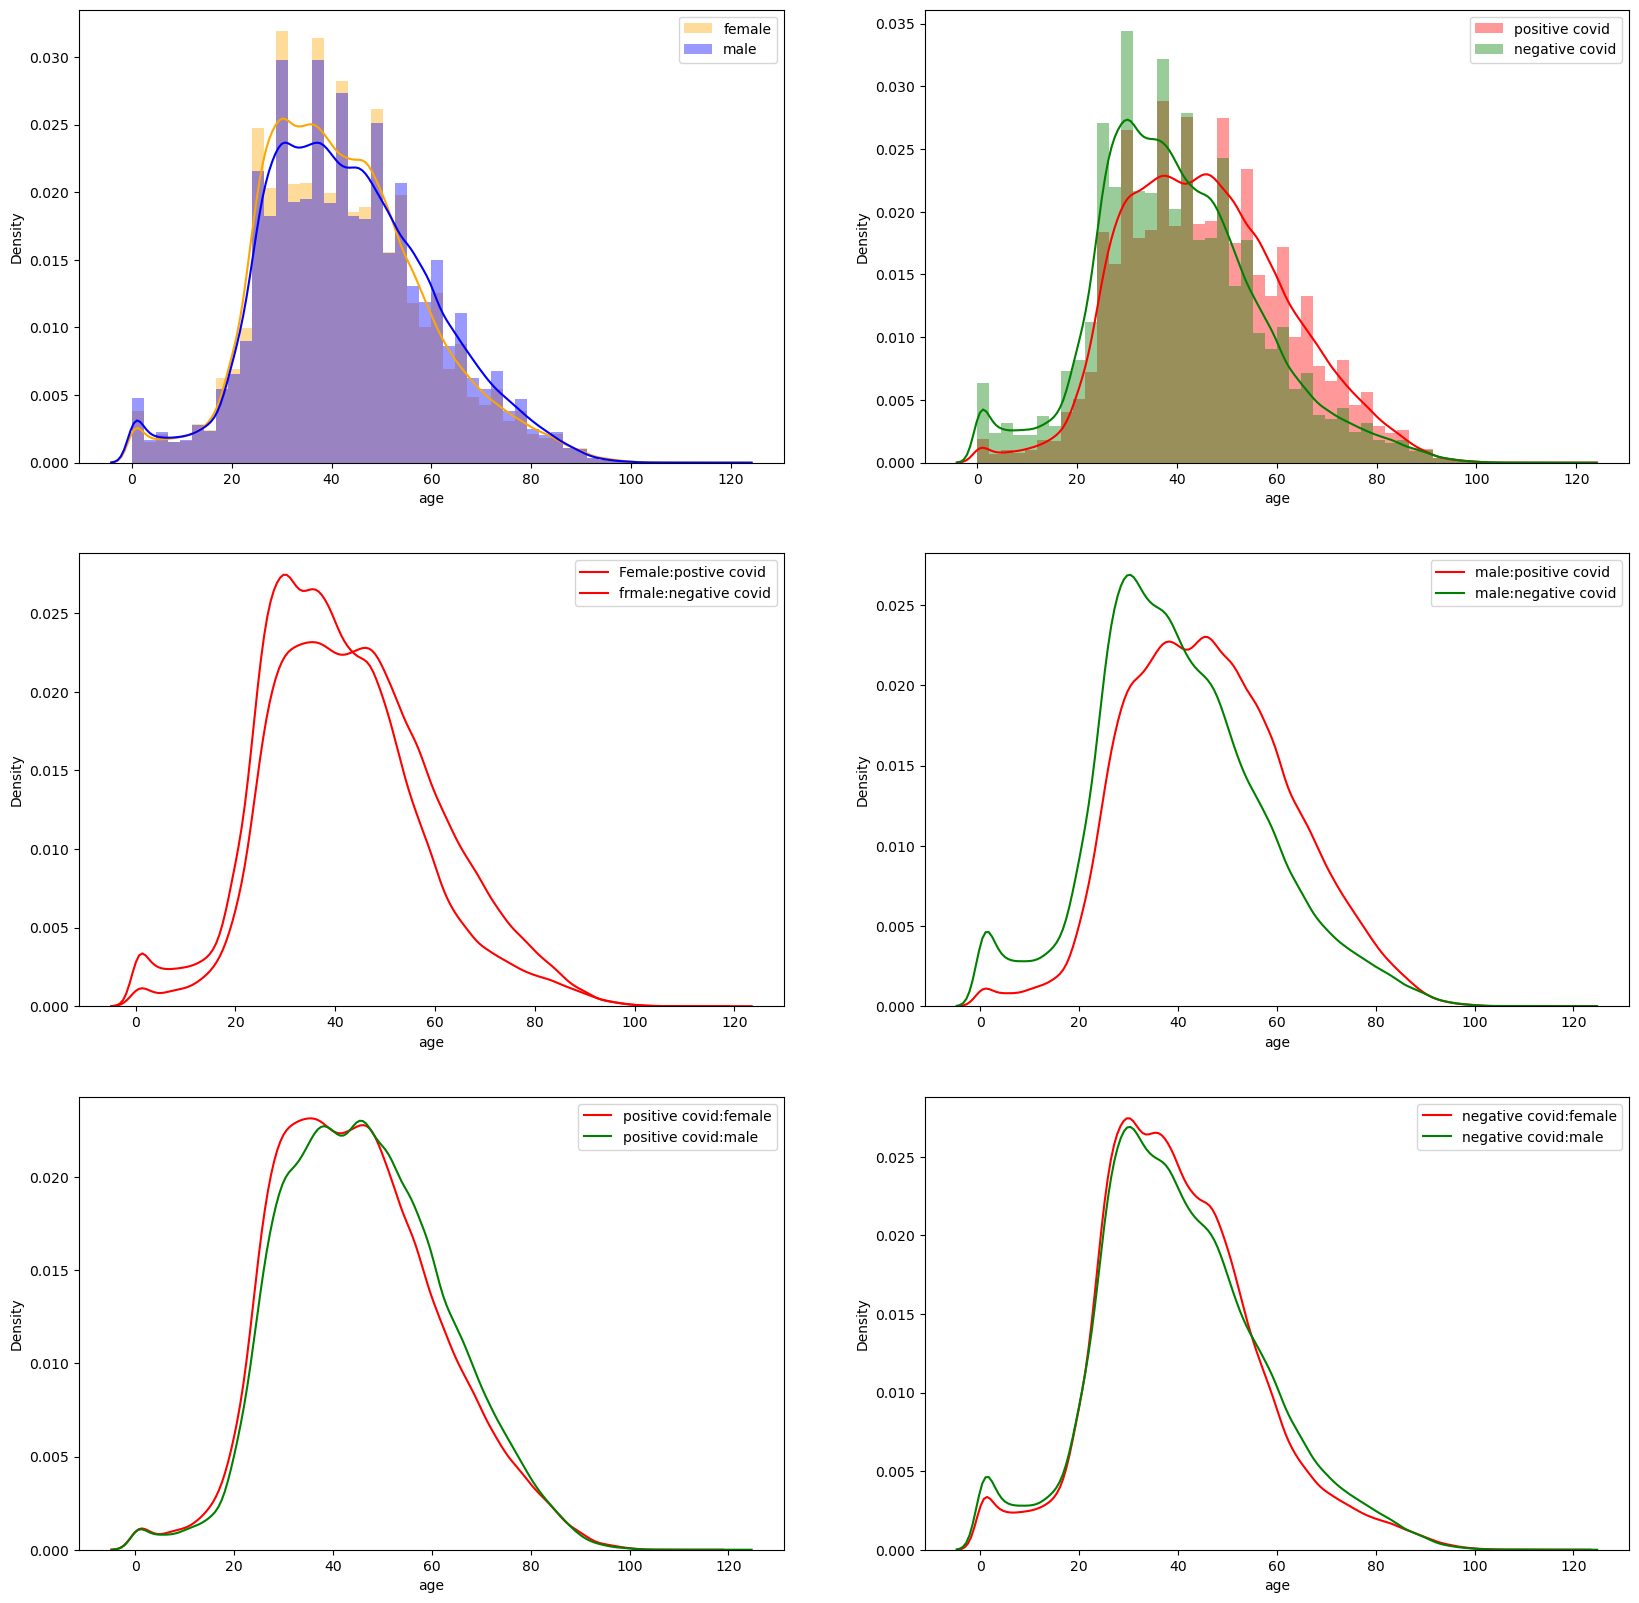

In [41]:
plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
sb.distplot(female['age'],kde=True,label='female',color = 'orange')
sb.distplot(male['age'],kde=True,label='male',color='blue')
plt.legend()

plt.subplot(3,2,2)
sb.distplot(df[df['covid_res']==1]['age'],kde=True,label='positive covid',color='red')
sb.distplot(df[df['covid_res']==2]['age'],kde=True,label='negative covid',color='green')
plt.legend()


plt.subplot(3,2,3)
sb.kdeplot(female_positive['age'],label='Female:postive covid',color='red')
sb.kdeplot(female_negative['age'],label='frmale:negative covid',color='red')
plt.legend()


plt.subplot(3,2,4)
sb.kdeplot(male_positive['age'],label='male:positive covid',color='red')
sb.kdeplot(male_negative['age'],label='male:negative covid',color='green')
plt.legend()


plt.subplot(3,2,5)
sb.kdeplot(female_positive['age'],label='positive covid:female',color='red')
sb.kdeplot(male_positive['age'],label='positive covid:male',color='green')
plt.legend()


plt.subplot(3,2,6)
sb.kdeplot(female_negative['age'],label='negative covid:female',color='red')
sb.kdeplot(male_negative['age'],label='negative covid:male',color='green')
plt.legend()

In [42]:
#Almost same distribusion regarding gender.
#Majority of patient are between 20 et 80 years old.
#A slight peak for low age values (children) with a positive covid test.

In [43]:
#date_columns=['entry_date','date_symptoms','date_died']
#for col in date_columns:
    #df[col]=pd.to_datetime(df[col],errors='coerce')
    #df[col]=pd.to_numeric(df[col],errors='coerce')

In [44]:
df

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,healthy
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,1,97,True
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,99,1,97,True
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,1,2,2,99,1,2,False
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,99,1,2,False
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,1,2,1,2,2,2,99,1,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566597,01ff60,2,1,13-05-2020,03-05-2020,9999-99-99,97,2,58,97,...,2,2,2,2,2,2,2,3,97,False
566598,047cd1,1,1,07-04-2020,06-04-2020,9999-99-99,97,2,48,2,...,2,2,2,2,2,2,2,3,97,True
566599,1beb81,1,2,14-05-2020,01-05-2020,9999-99-99,2,1,49,2,...,2,2,2,1,2,2,99,3,2,False
566600,16fb02,1,1,31-05-2020,29-05-2020,9999-99-99,97,1,43,2,...,2,2,2,2,2,2,2,3,97,False


correlation matrix

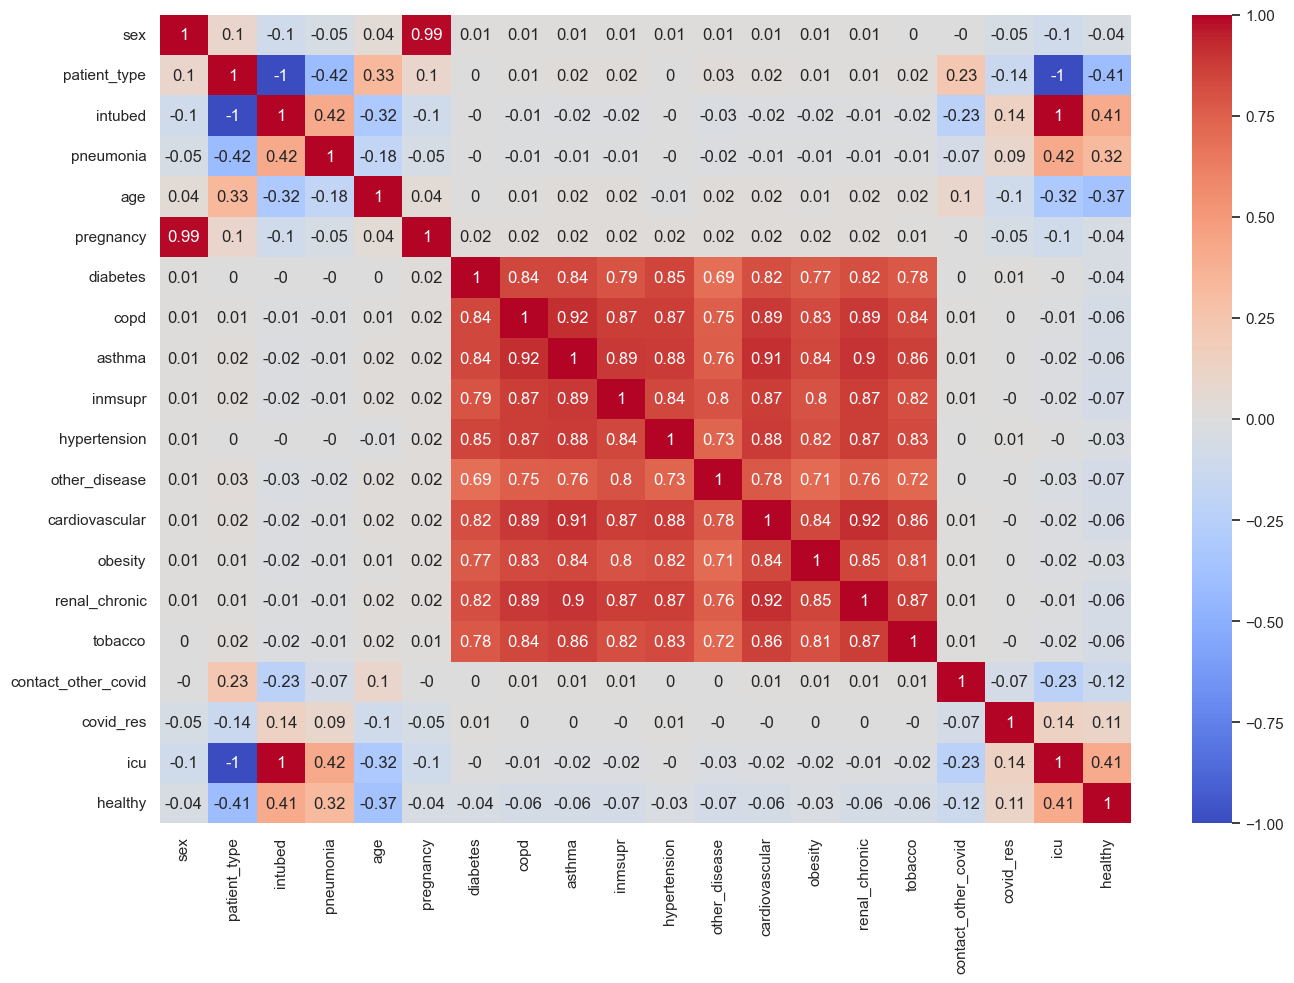

In [45]:
plt.figure(figsize=(14,10))
sb.set(style = 'white',font_scale=1)
sb.heatmap(data=df.corr().round(2),cmap = 'coolwarm' ,annot=True,annot_kws = {'size':12})
plt.tight_layout()
plt.show()

In [46]:
#It seems no correlation between features and our target 'covid_res'.
#The clinical signs are highly correlated with each other and with the tobacco variable.
#Some correlations are equal to 1!

# Preprocessing

In [47]:
df1 = data.copy()

In [48]:
df1=df.drop('id',axis=1)

In [49]:
df1['date_died'].replace('9999-99-99',2,True)
df1.loc[df1['date_died']!=2]=1


In [50]:
df1.intubed[(df1.intubed>2)]=2
df1.pneumonia[(df1.pneumonia>2)]=2
df1.pregnancy[(df1.pregnancy>2)]=2
df1.diabetes[(df1.diabetes>2)]=2
df1.copd[(df1.copd>2)]=2
df1.asthma[(df1.asthma>2)]=2
df1.inmsupr[(df1.inmsupr>2)]=2
df1.hypertension[(df1.hypertension>2)]=2
df1.other_disease[(df1.other_disease>2)]=2
df1.cardiovascular[(df1.cardiovascular>2)]=2
df1.obesity[(df1.obesity)>2]=2
df1.renal_chronic[(df1.renal_chronic>2)]=2
df1.tobacco[(df1.tobacco>2)]=2
df1.contact_other_covid[(df1.contact_other_covid>2)]=2
df1.covid_res[(df1.covid_res>2)]=2
df1.icu[(df1.icu>2)]=2






C:\Users\USER\AppData\Local\Temp\ipykernel_23656\1273699228.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.intubed[(df1.intubed>2)]=2
C:\Users\USER\AppData\Local\Temp\ipykernel_23656\1273699228.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.pneumonia[(df1.pneumonia>2)]=2
C:\Users\USER\AppData\Local\Temp\ipykernel_23656\1273699228.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.pregnancy[(df1.pregnancy>2)]=2
C:

In [51]:
df1

,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,...,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,healthy
0,2,1,04-05-2020,02-05-2020,2,2,2,27,2,2,...,2,2,2,2,2,2,2,1,2,True
1,2,1,19-03-2020,17-03-2020,2,2,2,24,2,2,...,2,2,2,2,2,2,2,1,2,True
2,1,2,06-04-2020,01-04-2020,2,2,2,54,2,2,...,2,2,2,1,2,2,2,1,2,False
3,2,2,17-04-2020,10-04-2020,2,2,1,30,2,2,...,2,2,2,2,2,2,2,1,2,False
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566597,2,1,13-05-2020,03-05-2020,2,2,2,58,2,1,...,2,2,2,2,2,2,2,2,2,False
566598,1,1,07-04-2020,06-04-2020,2,2,2,48,2,2,...,2,2,2,2,2,2,2,2,2,True
566599,1,2,14-05-2020,01-05-2020,2,2,1,49,2,2,...,2,2,2,1,2,2,2,2,2,False
566600,1,1,31-05-2020,29-05-2020,2,2,1,43,2,2,...,2,2,2,2,2,2,2,2,2,False


In [52]:
date_columns=['entry_date','date_symptoms']
for col in date_columns:
    df1[col]=pd.to_datetime(df1[col],errors='coerce')
    df1[col]=pd.to_numeric(df1[col],errors='coerce')

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-03-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\USER\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '17-04-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\USER\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '22-04-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\USER\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '21-05-2020' in DD/MM/YYYY format. Provide format or specify in

In [53]:
df1

,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,...,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,healthy
0,2,1,1586044800000000000,1580860800000000000,2,2,2,27,2,2,...,2,2,2,2,2,2,2,1,2,True
1,2,1,1584576000000000000,1584403200000000000,2,2,2,24,2,2,...,2,2,2,2,2,2,2,1,2,True
2,1,2,1591228800000000000,1578096000000000000,2,2,2,54,2,2,...,2,2,2,1,2,2,2,1,2,False
3,2,2,1587081600000000000,1601769600000000000,2,2,1,30,2,2,...,2,2,2,2,2,2,2,1,2,False
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566597,2,1,1589328000000000000,1583366400000000000,2,2,2,58,2,1,...,2,2,2,2,2,2,2,2,2,False
566598,1,1,1593820800000000000,1591228800000000000,2,2,2,48,2,2,...,2,2,2,2,2,2,2,2,2,True
566599,1,2,1589414400000000000,1578182400000000000,2,2,1,49,2,2,...,2,2,2,1,2,2,2,2,2,False
566600,1,1,1590883200000000000,1590710400000000000,2,2,1,43,2,2,...,2,2,2,2,2,2,2,2,2,False


split train/test set

In [54]:
from sklearn.model_selection import train_test_split
target = 'covid_res'
x=df1.drop([target],axis = 1)
y=df1[target]
# x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=1)


#with PCA
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(x)
print('explained variance:\n',pca.explained_variance_ratio_)

#choose the no. of components
pca_n = PCA(n_components=1)
X_pca_n = pca_n.fit_transform(x)
print('explained variance:\n',pca_n.explained_variance_ratio_)
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca_n,y,test_size=0.2,random_state=1)

explained variance:
 [9.99928923e-01 7.10772232e-05 2.32787438e-33 7.91669070e-34
 1.02019530e-36 7.29462512e-37 3.44663697e-37 2.98694022e-37
 2.33213840e-37 2.09803431e-37 1.42008292e-37 8.52662351e-38
 7.32634898e-38 5.82254419e-38 4.65981327e-38 4.03908046e-38
 3.89792771e-38 3.77308736e-38 2.29169545e-38 1.63228095e-38
 2.39228256e-40 3.03917692e-41]
explained variance:
 [0.99992892]


# MODELS

In [55]:
from sklearn import neighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report

In [56]:
def print_scores(model, y_test_pca, y_pred_pca):
    print("Model: ", model)
    print("-"*50)
    print("confusion matrix:\n",confusion_matrix(y_test_pca, y_pred_pca))
    print("-"*50)
    print("accuracy score:\n",accuracy_score(y_test_pca,y_pred_pca))
    print("-"*50)
    print("precision score:\n",precision_score(y_test_pca,y_pred_pca))
    print("-"*50)
    print("recall score:\n",recall_score(y_test_pca,y_pred_pca))
    print("-"*50)
    print("classification report:\n",classification_report(y_test_pca,y_pred_pca))

#### KNN

In [57]:
knn = neighbors.KNeighborsClassifier()
knn.fit(x_train_pca,y_train_pca)
y_pred_pca = knn.predict(x_test_pca)
model = "knn"
print_scores(model, y_test_pca, y_pred_pca)


C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Model:  knn
--------------------------------------------------
confusion matrix:
 [[22530 23444]
 [16866 50481]]
--------------------------------------------------
accuracy score:
 0.644284819230328
--------------------------------------------------
precision score:
 0.5718854706061529
--------------------------------------------------
recall scor:
 0.4900595989037282
--------------------------------------------------
classification report:
               precision    recall  f1-score   support

           1       0.57      0.49      0.53     45974
           2       0.68      0.75      0.71     67347

    accuracy                           0.64    113321
   macro avg       0.63      0.62      0.62    113321
weighted avg       0.64      0.64      0.64    113321



####  RF

In [58]:
RF = RandomForestClassifier(n_estimators=10,n_jobs=-1,random_state=1)
RF.fit(x_train_pca,y_train_pca)
y_pred_pca = RF.predict(x_test_pca)

model = "random forest"
print_scores(model, y_test_pca, y_pred_pca)


Model:  random forest
--------------------------------------------------
confusion matrix:
 [[16764 29210]
 [ 8528 58819]]
--------------------------------------------------
accuracy score:
 0.6669814068001518
--------------------------------------------------
precision score:
 0.6628182824608572
--------------------------------------------------
recall scor:
 0.36464088397790057
--------------------------------------------------
classification report:
               precision    recall  f1-score   support

           1       0.66      0.36      0.47     45974
           2       0.67      0.87      0.76     67347

    accuracy                           0.67    113321
   macro avg       0.67      0.62      0.61    113321
weighted avg       0.67      0.67      0.64    113321



#### DecisionTreeClassifier

In [59]:
from sklearn.tree import DecisionTreeClassifier
DC = DecisionTreeClassifier()

DC.fit(x_train_pca,y_train_pca)
y_pred_pca = DC.predict(x_test_pca)
model = "DecisionTreeClassifier"
print_scores(model, y_test_pca, y_pred_pca)

Model:  DecisionTreeClassifier
--------------------------------------------------
confusion matrix:
 [[16577 29397]
 [ 8138 59209]]
--------------------------------------------------
accuracy score:
 0.6687727782140998
--------------------------------------------------
precision score:
 0.6707262795872951
--------------------------------------------------
recall scor:
 0.3605733675555749
--------------------------------------------------
classification report:
               precision    recall  f1-score   support

           1       0.67      0.36      0.47     45974
           2       0.67      0.88      0.76     67347

    accuracy                           0.67    113321
   macro avg       0.67      0.62      0.61    113321
weighted avg       0.67      0.67      0.64    113321

